# Decision Tree Regression
- High Resolution
- Recommend 3D dimension

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
print(sys.executable)

/usr/local/bin/python3


In [2]:
df = pd.read_csv('/Users/yoo/Data-dev/algorithm/datasets/Position_Salaries.csv')
print(df.shape)

x = df[['Level']].values
y = df[['Salary']].values
print(x.shape, y.shape)
df

(10, 3)
(10, 1) (10, 1)


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [4]:
dt.predict([[6.5]])

array([150000.])

(90,)
(90, 1)


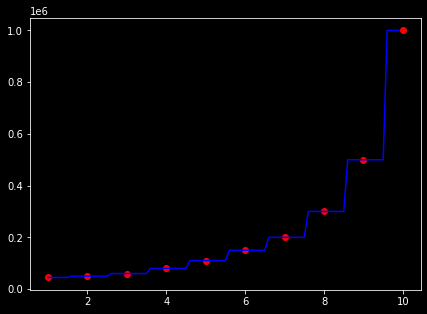

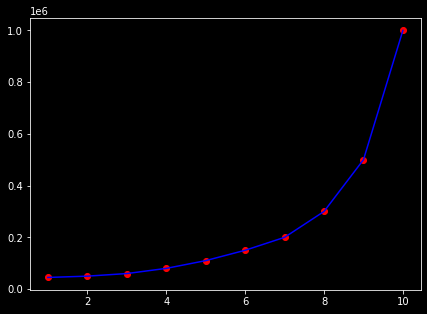

In [5]:
x_grid = np.arange(min(x), max(x), 0.1)
print(x_grid.shape)
x_grid = x_grid.reshape(len(x_grid), 1)
print(x_grid.shape)

plt.figure(figsize=(7,5))
plt.scatter(x, y, color='red')
plt.plot(x_grid, dt.predict(x_grid), color='blue')
plt.show()
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='red')
plt.plot(x, dt.predict(x), color='blue')
plt.show()

In [14]:
from sklearn.metrics import r2_score

r2_score = (y, dt.predict(x_grid))
r2_score

(array([[  45000],
        [  50000],
        [  60000],
        [  80000],
        [ 110000],
        [ 150000],
        [ 200000],
        [ 300000],
        [ 500000],
        [1000000]]),
 array([  45000.,   45000.,   45000.,   45000.,   45000.,   45000.,
          50000.,   50000.,   50000.,   50000.,   50000.,   50000.,
          50000.,   50000.,   50000.,   50000.,   60000.,   60000.,
          60000.,   60000.,   60000.,   60000.,   60000.,   60000.,
          60000.,   60000.,   80000.,   80000.,   80000.,   80000.,
          80000.,   80000.,   80000.,   80000.,   80000.,   80000.,
         110000.,  110000.,  110000.,  110000.,  110000.,  110000.,
         110000.,  110000.,  110000.,  110000.,  150000.,  150000.,
         150000.,  150000.,  150000.,  150000.,  150000.,  150000.,
         150000.,  150000.,  200000.,  200000.,  200000.,  200000.,
         200000.,  200000.,  200000.,  200000.,  200000.,  200000.,
         300000.,  300000.,  300000.,  300000.,  300000.,  3

# Random Forest Ensemble

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv('/Users/yoo/Data-dev/algorithm/datasets/Position_Salaries.csv')
print(df)
x = df[['Level']].values
y = df[['Salary']].values

print(x.shape, y.shape)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
(10, 1) (10, 1)


In [141]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(random_state=42)

In [142]:
y_pred = rf.predict(x)
y_pred = np.array((y_pred).astype(int))
y_pred = pd.DataFrame(y_pred, columns=['Pred Salary'])
y_pred

,Pred Salary
0,49250
1,50700
2,59050
3,77400
4,105100
5,140100
6,202600
7,278500
8,466000
9,785000


In [143]:
df_ = pd.concat([df,y_pred],axis=1)
df_['delta'] = df_['Salary'] - df_['Pred Salary']
df_

,Position,Level,Salary,Pred Salary,delta
0,Business Analyst,1,45000,49250,-4250
1,Junior Consultant,2,50000,50700,-700
2,Senior Consultant,3,60000,59050,950
3,Manager,4,80000,77400,2600
4,Country Manager,5,110000,105100,4900
5,Region Manager,6,150000,140100,9900
6,Partner,7,200000,202600,-2600
7,Senior Partner,8,300000,278500,21500
8,C-level,9,500000,466000,34000
9,CEO,10,1000000,785000,215000


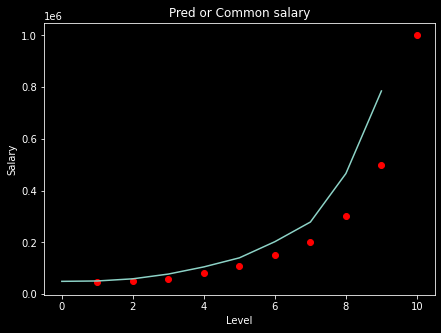

In [144]:
plt.figure(figsize=(7,5))
plt.scatter(df_['Level'], df_['Salary'], color='red')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Pred or Common salary")
plt.plot(df_['Pred Salary'])
plt.show()

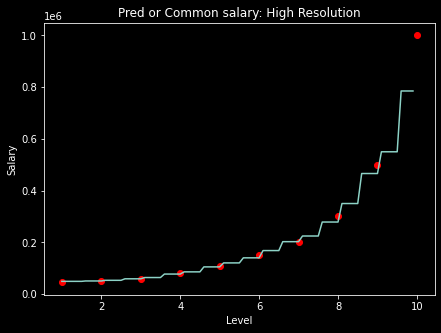

In [145]:
plt.figure(figsize=(7,5))

x_grid = np.arange(min(x), max(x), 0.1)
x_gird = x_grid.reshape((len(x_grid), 1))

# for i in x:
#     for _ in i:
#         _.astype(int)
#     x.append(_)

plt.scatter(df_['Level'], df_['Salary'], color='red')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Pred or Common salary: High Resolution")
plt.plot(x_grid, rf.predict(x_grid.reshape(len(x_grid),1)))
plt.show()

# Elastic Regression

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


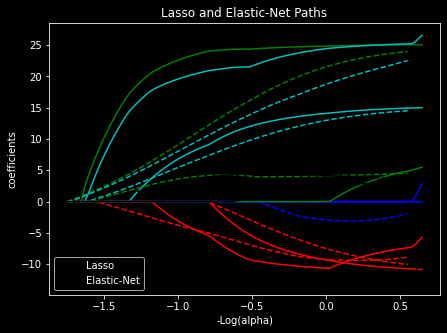

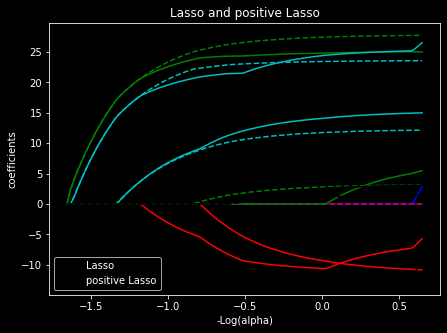

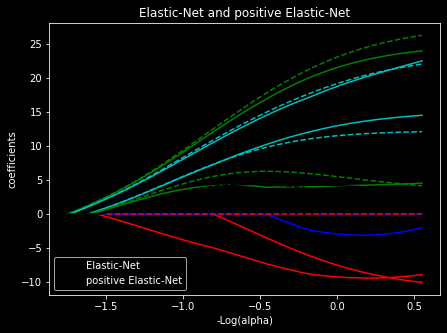

In [150]:
# @Copyright Sklearn Example

from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets


X, y = datasets.load_diabetes(return_X_y=True)


X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True
)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True
)

# Display results

plt.figure(figsize=(7,5))
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower left")
plt.axis("tight")


plt.figure(figsize=(7,5))
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and positive Lasso")
plt.legend((l1[-1], l2[-1]), ("Lasso", "positive Lasso"), loc="lower left")
plt.axis("tight")


plt.figure(figsize=(7,5))
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Elastic-Net and positive Elastic-Net")
plt.legend((l1[-1], l2[-1]), ("Elastic-Net", "positive Elastic-Net"), loc="lower left")
plt.axis("tight")
plt.show()

# Model selection